### Import relevant libraries


In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Get data


In [10]:
npz = np.load('train_data.npz', allow_pickle=True)

train_inputs = npz['inputs'].astype(float)
train_targets = npz['targets'].astype(float)
# astype() creates a copy of the array, cast to a specific type
# to ensure our model learns correctly we accept all inputs to be float
# even though our targets are 0 and 1, we are not completely certain that they will extracted as integers, floats or booleans, so we cast targets too

npz = np.load('validation_data.npz', allow_pickle=True)

validation_inputs = npz['inputs'].astype(float)
validation_targets = npz['targets'].astype(float)

npz = np.load('test_data.npz', allow_pickle=True)

test_inputs , test_targets = npz['inputs'].astype(float) , npz['targets'].astype(float)

### Models


##### 1. Logistic Regression


In [11]:
model = LogisticRegression()

combined_train_features = np.concatenate((train_inputs, validation_inputs), axis = 0)
combined_train_targets = np.concatenate((train_targets, validation_targets), axis = 0)

model.fit(combined_train_features, combined_train_targets)

# Predicting on the test set
y_pred = model.predict(test_inputs)

# Evaluate model performance
lr_accuracy = accuracy_score(test_targets, y_pred)
conf_matrix = confusion_matrix(test_targets, y_pred)
class_report = classification_report(test_targets, y_pred)

print(f'Accuracy: {lr_accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.79
Confusion Matrix:
[[46  5]
 [11 15]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85        51
         1.0       0.75      0.58      0.65        26

    accuracy                           0.79        77
   macro avg       0.78      0.74      0.75        77
weighted avg       0.79      0.79      0.78        77



##### 2. Decision tree classifier


In [12]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
model = DecisionTreeClassifier()

# Combine train and validation sets
combined_train_features = np.concatenate((train_inputs, validation_inputs), axis=0)
combined_train_targets = np.concatenate((train_targets, validation_targets), axis=0)

# Train the model on combined data
model.fit(combined_train_features, combined_train_targets)

# Predicting on the test set
y_pred = model.predict(test_inputs)

# Evaluate model performance
dt_accuracy = accuracy_score(test_targets, y_pred)
conf_matrix = confusion_matrix(test_targets, y_pred)
class_report = classification_report(test_targets, y_pred)

print(f'Accuracy: {dt_accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.74
Confusion Matrix:
[[38 13]
 [ 7 19]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79        51
         1.0       0.59      0.73      0.66        26

    accuracy                           0.74        77
   macro avg       0.72      0.74      0.72        77
weighted avg       0.76      0.74      0.75        77



##### 3. Random Forest


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
model = RandomForestClassifier()

# Combine train and validation sets
combined_train_features = np.concatenate((train_inputs, validation_inputs), axis=0)
combined_train_targets = np.concatenate((train_targets, validation_targets), axis=0)

# Train the model on combined data
model.fit(combined_train_features, combined_train_targets)

# Predicting on the test set
y_pred = model.predict(test_inputs)

# Evaluate model performance
rf_accuracy = accuracy_score(test_targets, y_pred)
conf_matrix = confusion_matrix(test_targets, y_pred)
class_report = classification_report(test_targets, y_pred)

print(f'Accuracy: {rf_accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.78
Confusion Matrix:
[[42  9]
 [ 8 18]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        51
         1.0       0.67      0.69      0.68        26

    accuracy                           0.78        77
   macro avg       0.75      0.76      0.76        77
weighted avg       0.78      0.78      0.78        77



##### 4. Support Vector Machine


In [14]:
from sklearn.svm import SVC

# Initialize SVM model
model = SVC()

# Combine train and validation sets
combined_train_features = np.concatenate((train_inputs, validation_inputs), axis=0)
combined_train_targets = np.concatenate((train_targets, validation_targets), axis=0)

# Train the model on combined data
model.fit(combined_train_features, combined_train_targets)

# Predicting on the test set
y_pred = model.predict(test_inputs)

# Evaluate model performance
svm_accuracy = accuracy_score(test_targets, y_pred)
conf_matrix = confusion_matrix(test_targets, y_pred)
class_report = classification_report(test_targets, y_pred)

print(f'Accuracy: {svm_accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.81
Confusion Matrix:
[[47  4]
 [11 15]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86        51
         1.0       0.79      0.58      0.67        26

    accuracy                           0.81        77
   macro avg       0.80      0.75      0.76        77
weighted avg       0.80      0.81      0.80        77



##### 5. Neural Network


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(train_inputs.shape[1],)),  # Input layer with 64 neurons, relu activation
    Dense(64, activation='relu'),  # Hidden layer with 32 neurons, relu activation
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation (for binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary crossentropy for binary classification
              metrics=['accuracy'])

# Train the model with validation data
history = model.fit(train_inputs, train_targets, 
                    epochs=50, batch_size=32, verbose=1,
                    validation_data=(validation_inputs, validation_targets))

# Predicting on the test set
y_pred_proba = model.predict(test_inputs)  # Predict probabilities
y_pred = (y_pred_proba > 0.5).astype('int32')  # Convert probabilities to binary predictions

# Evaluate model performance
nn_accuracy = accuracy_score(test_targets, y_pred)
conf_matrix = confusion_matrix(test_targets, y_pred)
class_report = classification_report(test_targets, y_pred)

print(f'Accuracy: {nn_accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Epoch 1/50


c:\Users\Atharva\Anaconda3\envs\py_tf\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6050 - loss: 0.6796 - val_accuracy: 0.6860 - val_loss: 0.6300
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - loss: 0.6293 - val_accuracy: 0.7674 - val_loss: 0.5858
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7040 - loss: 0.6029 - val_accuracy: 0.7791 - val_loss: 0.5318
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7439 - loss: 0.5502 - val_accuracy: 0.7791 - val_loss: 0.5110
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7631 - loss: 0.5281 - val_accuracy: 0.8140 - val_loss: 0.4524
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7502 - loss: 0.4851 - val_accuracy: 0.8140 - val_loss: 0.4443
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7587 - loss: 0.5006 - val_accuracy: 0.8256 - val_loss: 0.4285
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7656 - loss: 0.4625 - val_accuracy: 0.7907 - val_loss: 0.4445
Epo

### Accuracies


C:\Users\Atharva\AppData\Local\Temp\ipykernel_14424\1859578244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


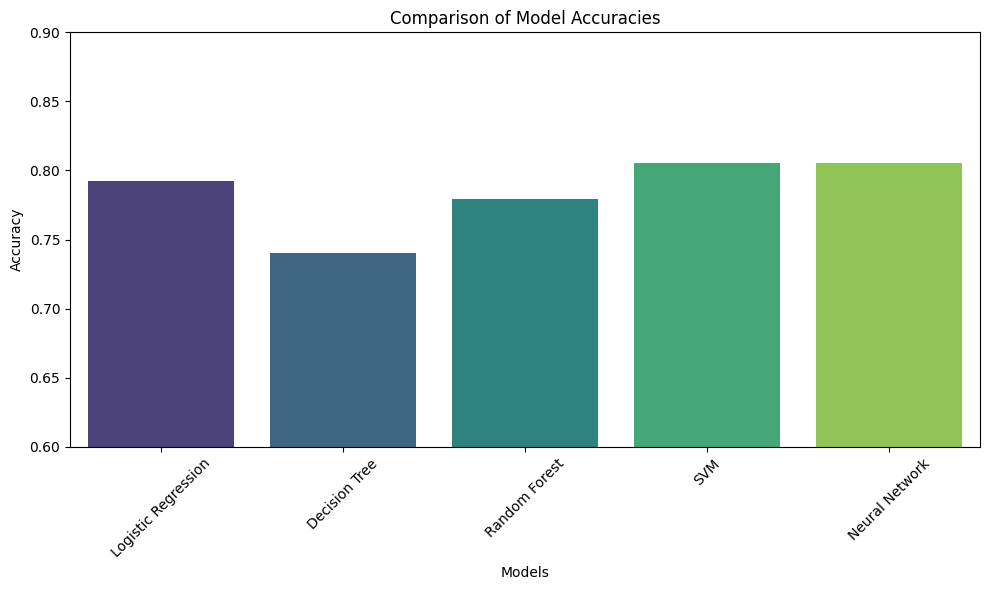

In [16]:
# List of models and their accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Neural Network']
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, nn_accuracy]

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0.6, 0.9)  # Adjust the y-axis limits if needed
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()